In [1]:
import PIL
print(PIL.__version__)


9.4.0


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import random
import os
from tqdm import tqdm
import csv
import cv2
%matplotlib inline


In [226]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/ashutosh/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-7 Python-3.10.0 torch-2.0.1+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
import urllib.request
urllib.request.urlretrieve('https://blog.finxter.com/wp-content/uploads/2022/04/greenland_01a.jpg',"img.jpg")


('img.jpg', <http.client.HTTPMessage at 0x7fc7fb8568f0>)

In [5]:
img = "img.jpg"

In [6]:
results = model(img)
results.print()

image 1/1: 360x640 7 persons, 1 boat
Speed: 8.1ms pre-process, 94.5ms inference, 1.3ms NMS per image at shape (1, 3, 384, 640)


In [28]:
!cd yolov5 && python train.py --img 640 --epochs 50 --data /home/ashutosh/work/od/yolov5/data/dataset.yaml --weights yolov5s.pt --workers 8

train: weights=yolov5s.pt, cfg=, data=/home/ashutosh/work/od/yolov5/data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
Unpacking objects: 100% (4/4), 2.27 KiB | 2.27 MiB/s, done.
remote: Total 4 (delta 1), reused 3 (delta 1), pack-reused 0
From https://github.com/ultralytics/yolov5
   2270f0d..0897415  master     -> origin/master
github: ⚠️ YOLOv5 is out of date by

In [11]:
%pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchtext==0.14.1 torchaudio==0.13.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple, https://download.pytorch.org/whl/cu117
  Using cached https://download.pytorch.org/whl/cu117/torch-1.13.1%2Bcu117-cp310-cp310-linux_x86_64.whl (1801.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/abinash/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-7 Python-3.10.0 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7066762 parameters, 0 gradients
Adding AutoShape... 


In [218]:
def get_random_file_paths(directory, num_files):
    file_list = [os.path.join(directory, file) for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]
    if not file_list:
        raise ValueError("No files found in the directory.")

    return random.sample(file_list, num_files)

In [5]:
test_img = "data/images/mix6.jpg"
# test_img = get_random_file_paths("data/images/", 1)

test_img = test_img if type(test_img) == str else test_img[0]

results = model(test_img)
results.print()


image 1/1: 480x640 1 Arduino Uno, 1 Nvidia Jetson Nano
Speed: 57.0ms pre-process, 266.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


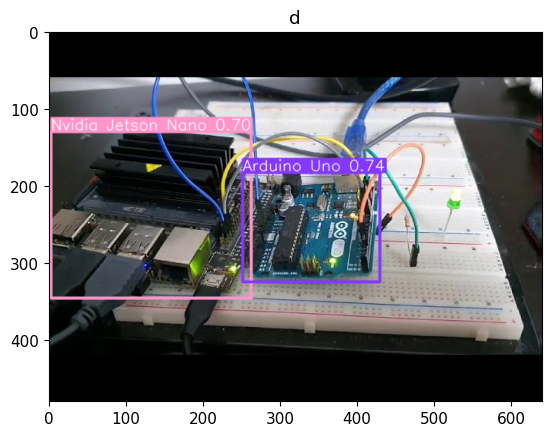

In [9]:
plt.imshow(np.squeeze(results.render()))
plt.title(test_img[0].split("/")[-1])
plt.show()

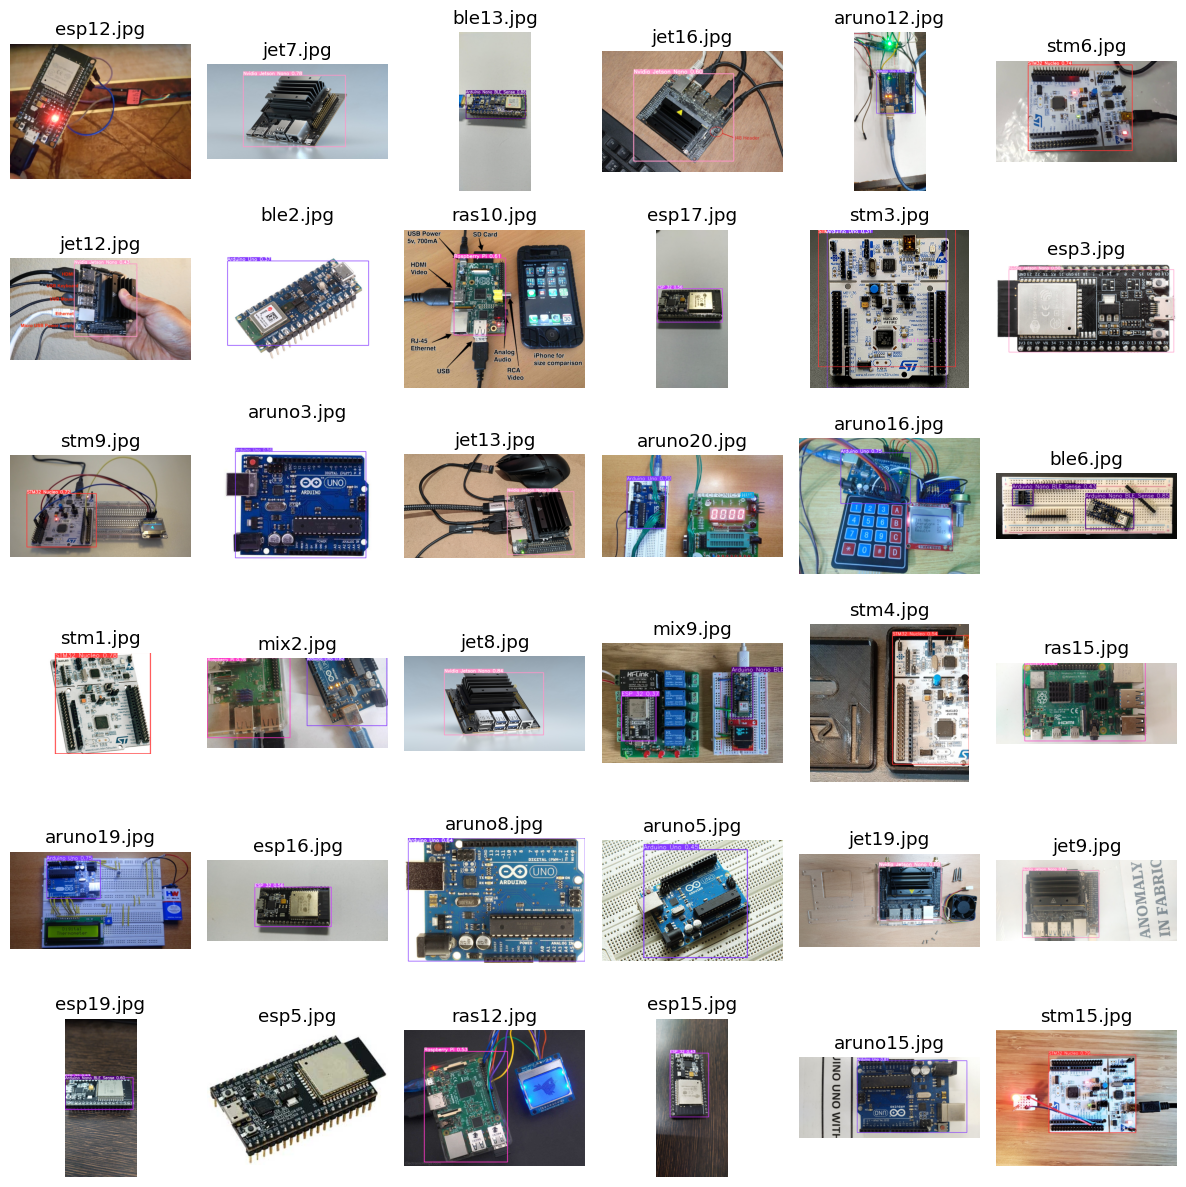

In [156]:
num_images_per_row = 6
num_rows = 6

directory_path = "data/images/"
random_file_paths = get_random_file_paths(directory_path, num_images_per_row * num_rows)

fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(12, 12))

for i, file_path in enumerate(random_file_paths):
    results = model(file_path)
    ax = axes[i // num_images_per_row, i % num_images_per_row]
    ax.imshow(np.squeeze(results.render()))
    ax.set_title(file_path.split("/")[-1])
    ax.axis("off")

plt.tight_layout()
plt.show()

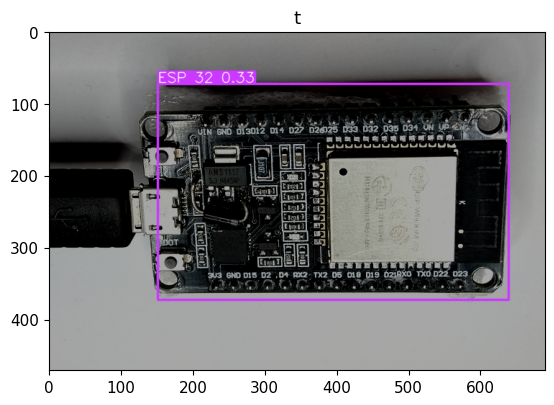

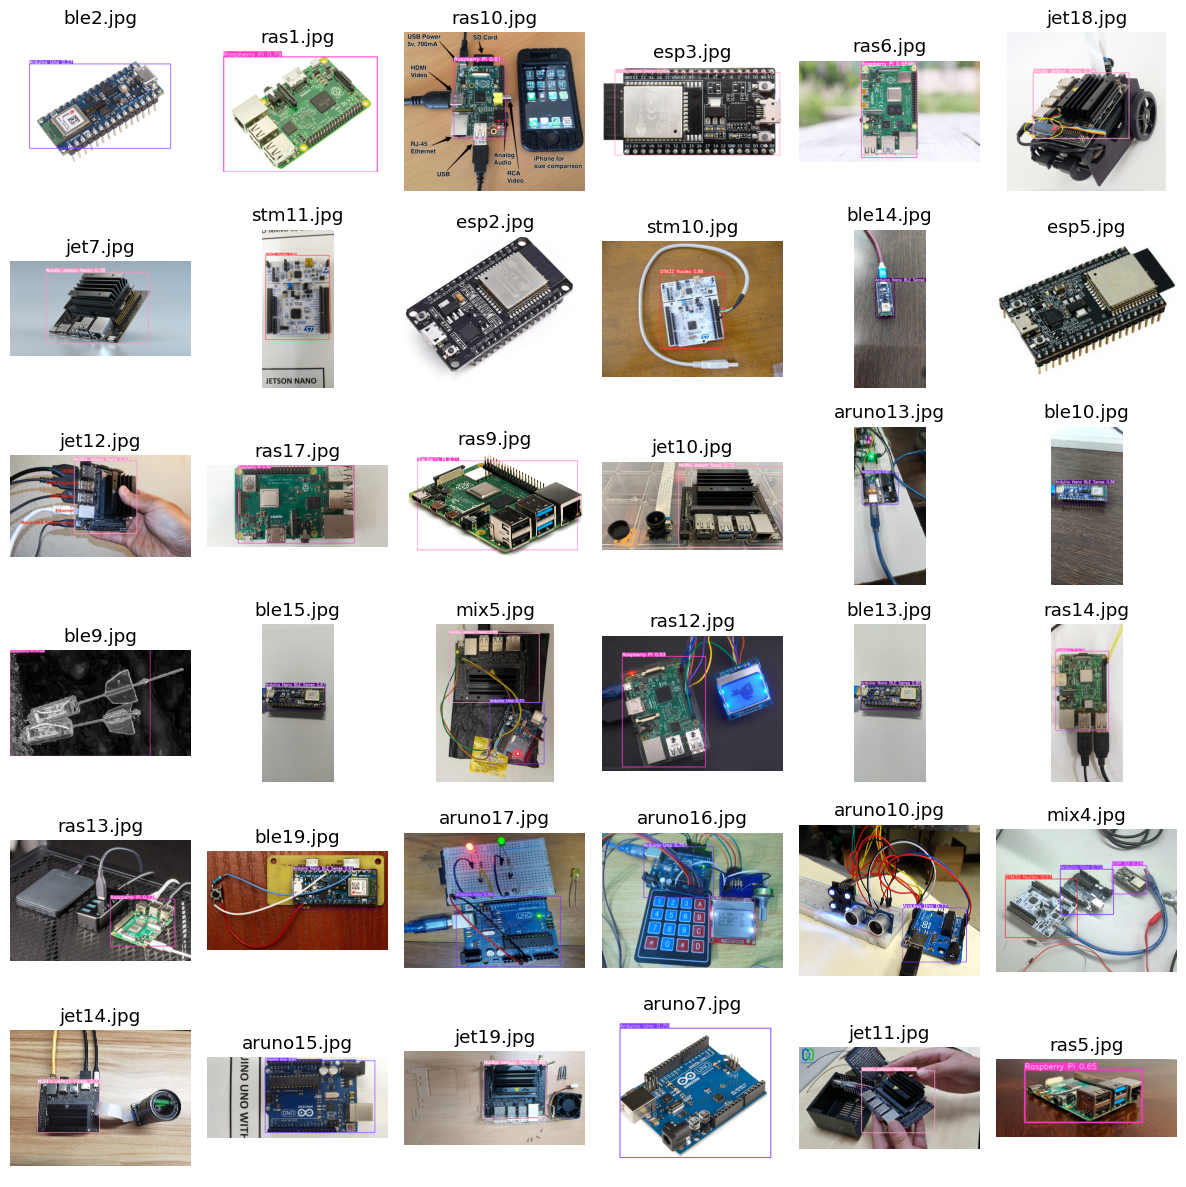

In [12]:

plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
model2 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/ashutosh/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-5 Python-3.10.0 torch-2.0.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


image 1/1: 480x640 1 Arduino Uno, 1 Nvidia Jetson Nano
Speed: 5.0ms pre-process, 64.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)


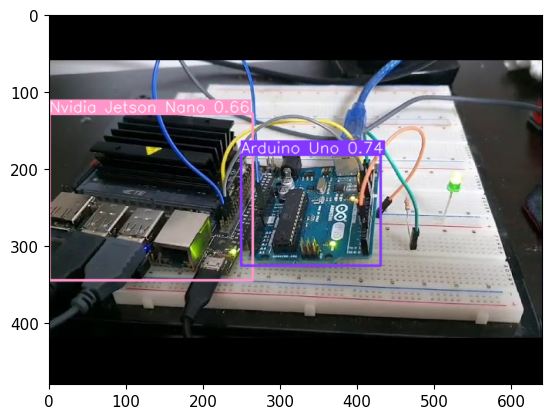

In [176]:
test_img = "data/images/mix6.jpg"
# test_img = get_random_file_paths("data/images/", 1)

test_img = test_img if type(test_img) == str else test_img[0]

results = model2(test_img)
results.print()
plt.imshow(np.squeeze(results.render()))


In [138]:
results.names

{0: 'dog',
 1: 'person',
 2: 'cat',
 3: 'tv',
 4: 'car',
 5: 'meatballs',
 6: 'marinara sauce',
 7: 'tomato soup',
 8: 'chicken noodle soup',
 9: 'french onion soup',
 10: 'chicken breast',
 11: 'ribs',
 12: 'pulled pork',
 13: 'hamburger',
 14: 'cavity',
 15: 'Arduino Uno',
 16: 'Arduino Nano BLE Sense',
 17: 'ESP 32',
 18: 'Nvidia Jetson Nano',
 19: 'Raspberry Pi',
 20: 'STM32 Nucleo'}

In [177]:
highest_confidence_index = results.pred[0][:, -2].argmax().item()
results.names[int(results.pred[0][highest_confidence_index][-1])]



'Arduino Uno'

In [171]:
for i in range(1,17):
    print('"data/images/stm'+str(i)+'.jpg", "STM32 Nucleo",')

"data/images/stm1.jpg", "STM32 Nucleo",
"data/images/stm2.jpg", "STM32 Nucleo",
"data/images/stm3.jpg", "STM32 Nucleo",
"data/images/stm4.jpg", "STM32 Nucleo",
"data/images/stm5.jpg", "STM32 Nucleo",
"data/images/stm6.jpg", "STM32 Nucleo",
"data/images/stm7.jpg", "STM32 Nucleo",
"data/images/stm8.jpg", "STM32 Nucleo",
"data/images/stm9.jpg", "STM32 Nucleo",
"data/images/stm10.jpg", "STM32 Nucleo",
"data/images/stm11.jpg", "STM32 Nucleo",
"data/images/stm12.jpg", "STM32 Nucleo",
"data/images/stm13.jpg", "STM32 Nucleo",
"data/images/stm14.jpg", "STM32 Nucleo",
"data/images/stm15.jpg", "STM32 Nucleo",
"data/images/stm16.jpg", "STM32 Nucleo",


In [208]:
image_paths = []
ground_truth_labels = []
with open('test_data.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        image_paths.append(row[0].strip())  # Remove leading/trailing spaces
        ground_truth_labels.append(row[1].strip())

In [209]:
print(image_paths)

['data/images/aruno1.jpg', 'data/images/aruno2.jpg', 'data/images/aruno3.jpg', 'data/images/aruno4.jpg', 'data/images/aruno5.jpg', 'data/images/aruno6.jpg', 'data/images/aruno7.jpg', 'data/images/aruno8.jpg', 'data/images/aruno9.jpg', 'data/images/aruno10.jpg', 'data/images/aruno11.jpg', 'data/images/aruno12.jpg', 'data/images/aruno13.jpg', 'data/images/aruno14.jpg', 'data/images/aruno15.jpg', 'data/images/aruno16.jpg', 'data/images/aruno17.jpg', 'data/images/aruno18.jpg', 'data/images/aruno19.jpg', 'data/images/aruno20.jpg', 'data/images/ble1.jpg', 'data/images/ble2.jpg', 'data/images/ble3.jpg', 'data/images/ble4.jpg', 'data/images/ble5.jpg', 'data/images/ble6.jpg', 'data/images/ble7.jpg', 'data/images/ble8.jpg', 'data/images/ble9.jpg', 'data/images/ble10.jpg', 'data/images/ble11.jpg', 'data/images/ble12.jpg', 'data/images/ble13.jpg', 'data/images/ble14.jpg', 'data/images/ble15.jpg', 'data/images/ble16.jpg', 'data/images/ble17.jpg', 'data/images/ble18.jpg', 'data/images/ble19.jpg', 'd

In [214]:
correct_predictions = 0
total_images = len(image_paths)

for image_path, ground_truth_label in tqdm(zip(image_paths, ground_truth_labels)):
    results = model(image_path)

    # Check if any objects were detected
    if len(results.pred[0]) == 0:
        continue

    # Find the index of the highest confidence score
    highest_confidence_index = results.pred[0][:, -2].argmax().item()

    # Get the corresponding class label for the highest confidence prediction
    predicted_label = results.names[int(results.pred[0][highest_confidence_index][-1])]
    # print(predicted_label)
    # print(ground_truth_label)
    # print("-----------------------")
    if predicted_label == ground_truth_label:
        correct_predictions += 1

accuracy = (correct_predictions / total_images) * 100
print(f"Accuracy: {accuracy:.2f}%")

114it [00:07, 15.54it/s]

Accuracy: 91.23%


104

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [201]:
import csv

input_file = "test_data.csv"
output_file = "output.csv"

modified_data = []

with open(input_file, "r") as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        path = row[0]
        label = row[1].strip('"') if len(row) > 1 else ""
        modified_data.append((path, label))

with open(output_file, "w", newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter='\t')  # Specify the delimiter as '\t' for tab separation
    writer.writerows(modified_data)

